# <big>Complete Notes</big><br>ECE244 : Programming Fundamentals

&nbsp;&nbsp;&nbsp; Yvonne Yang
&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp; University of Toronto
&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp; Last updated: 2020/12/01

---  

Welcome to the ECE244 notebook.  

In this magic notebook, you will see notes as well as pieces of C++ code that you can interact with.  

## Table of Contents  
* [How to use this notebook](#tut)
* [09/15 - Introduction to C++](#09/15)  
* [09/16 - Function Prototypes & Compilation](#09/16)   
* [09/17 - The C Preprocessor & More Compilation](#09/17)  
* [09/22 - Classes & Objects](#09/22)  
* [09/23 - Classes & Objects](#09/23)  
* [09/24 - Classes & Objects - Program Organization and Constructors](#09/24)  
* [09/29 - Classes & Objects- Destructor and 'this' pointer](#09/29)  
* [09/30 - C++ I/O - Console input](#09/30)  
* [10/01 - C++ I/O - Cin errortrapping](#10/01)  
* [10/06 - C++ I/O - The getline function and custom streams](#10/06)  
* [10/07 - C++ I/O miscellaneous and Pointers, Scopes, Arrays ](#10/07)  
* [10/08 - Pointers, Scopes, Arrays ](#10/08)  
* [10/13 - Pointers, Scopes, Arrays ](#10/13)  
* [10/14 - Pointers, Scopes, Arrays ](#10/14)  
* [10/15 - Pointers, Scopes, Arrays & Operator overloading](#10/15)  
* [10/20 - Operator overloading & copy constructor](#10/20)  
* [10/21 - Operator overloading example](#10/21)  
* [10/27 - Objects that contain pointers](#10/27)  
* [Fun extra stuff on classes](#extra1)  
* [Fun extra stuff on operator overloading](#extra2)  
* [11/03 - Linked Lists](#11/03)  
* [11/05 - Recursion](#11/05)  
* [11/17 - Binary tree](#11/17)  
* [11/18 - Binary tree & Inheritance](#11/18)  
* [11/24 - Inheritance](#11/24)
* [11/25 - Inheritance](#11/25)
* [11/26 - Inheritance](#11/26)
* [12/01 - Inheritance](#12/01)
* [Fun extra stuff on inheritance](#extra2)  
* [12/02 - Inheritance](#12/02)
---  
To start, move to the next cell and press \<Shift+Enter> to execute it. 

\**Note: It is crucial to run this set-up cell before you test out anything else on this notebook, as it imports the necessary libraries.*

In [11]:
/*** Set up this notebook ***/
#pragma once
#include <iostream>
#include <string>
#include <iomanip>
using namespace std;

## How to use this notebook  <a class = "anchor" id = "tut"></a>

Thanks to Jupyter Notebook and Xeus Cling, we can do many interesting things here.  
You will never have to go through the pain of making files and projects just to output "hello world". You can print it directly (see next cell). You can declare variables and play with them. You can also do fast computations here, treating the notebook as a calculator.  
Test these out below.  
<br>
\**Note: Even here, C++ does not allow duplicate definitions of variables. It's good practice to use braces to make an anonymous cell with temporary variables so that it can be run multiple times.*

In [2]:
cout << "hello world";

hello world

In [3]:
{
    int ece = 244;
    cout << "Your variable ece = " << ece;
}

Your variable ece = 244

In [4]:
log(1024*32) // Computations

10.397208

## 09/15 - Introduction to C++ <a class="anchor" id="09/15"></a> 
---
### An example program 
A standard cpp program is shown here:
```cpp
#include <iostream>
using namespace std;

int main () {
    cout << "Hello world!" << endl; // see below
    return (0);
}

// Recall that in C this is equivalent to 
// printf("Hello World!\n");
```
\**Note: This main method won't run here but will run in a separate .cpp file.*  

Explanations of the above program 
- `<iostream>` is the standard I/O library for cpp. Notice the use of angle brackets and the ommission of the ".h"
- `namespace` is a container for names; allows code to flow without conflict of variable names from diff programs. `namespace std` allows us to use functions like `cout` and `endl` without having to write `std::cout` and `std::endl` every time.  
\* To disambiguate the variable, say `cout`, that we're using without specifying the whole namespace, replace the `using namespace...` line with `using std::cout`
- `main` function is the entry point of the program
- `cout` stands for console output, `cin` is console input
- `<<` is called a "stream insertion operator", for now, think of it as "send to"
- `endl` indicates end of line like '\n' in C   

Test out console input and output below:

In [5]:
/* Enter an integer and have it outputted */
{
    int integer;
    cin >> integer; // in
    cout << "Your integer: " << integer; // out
}
// equivalent to scanf ("%d", &integer); in C

1234
Your integer: 1234

### Variables in C++
- declarations are just as in C
- there is a new type called "bool" for boolean values (true or false)
```cpp
bool coding = true;
```

The metatype **auto**  
- a C++ keyword used in place of a type declaration so that the compiler deduces the type from the initializer
```cpp
auto length = 6; // the variable count automatically becomes of type int  
auto maxLen = length; // compiler looks at count and matches maxCount to the type of count  
auto minLen = length;
```
- say you create some variables of the same type, then decide to change the data type for all of them, then auto really saves time!
```cpp
// To change length and related variables' types, simple do:
auto length = 6.0;
```
- **Warning**: cannnot use auto without initialization! Results in compiler error!  

### Constants (\* not course material)  
Keyword `constexpr`
- very similar to `const`, but is for functions/expressions. For example:  
```cpp
constexpr double GetPi() {return 22.0/7;}
// the following also works
constexpr double TwicePi() {return GetPi()*2;}
```
- in C++11, this is better than `const` because it evaluates the expression at compile time, instead of runtime, thus making the program run faster

### Expressions and statements
- including arithmetic and logic expressions (+,/,<,etc.), if-else if-else, while, for
- all similar to C  

### Strings
- in C, strings are character arrays and you must remember their terminating null character
- C++ improves this by providing a data type called string (remember to `#include <string>`)  

Below is a demo of functions on C++ strings:

In [6]:
/* C++ built-in string functions */
{
string s1 = "I code";
string s2 = "in C";
string str = s1 + " " + s2; // concatenation with + operator
cout << str << endl;

if (str.find ("C++") == string::npos) // substring not found
{
    unsigned int size = str.size(); // length of string; alternatively, use str.length()
    str.resize(size + 2, '+'); // resize string and fill the new spaces with '+'
    cout << str << endl;
}
}

I code in C
I code in C++


### Functions  
- like in C, parameter is passed by value: if you pass `y` into `int foo(int v)`, then `v` becomes a copy of `y` and `foo` cannot change `y`'s value  

The good ol' swap-two-variables function:  
- in C, we have to write:  
```c
void swap (int* x, int* y)
{
    int temp = *x;
    *x = *y;
    *y = temp;
}
```  
and if we have `int a` and `int b`, call the function with 
```cpp
swap(&a, &b);
```
- syntactic sugar in C++: `void swap (int & x, int & y)` tells cpp to pass by **reference** instead of **value**. So we can simply write:  
```cpp
void swap (int & x, int & y)
{
    int temp = x;
    x = y;
    y = temp;
}
```  
and if we have `int a` and `int b`, call the function with 
```cpp
swap(a, b);
```
- note that this overloads the symbol `&` and is different from the reference operator `&`

## 09/16 - Function Prototypes & Compilation <a class="anchor" id="09/16"></a>
---  
&nbsp;&nbsp;&nbsp;\* file extensions: .cxx or .cc or .cpp are all good  

### Function prototype  
- the problem: in C++ as in other languages, functions must be defined before they're called
- a solution: when a function calls another function foo(), put a prototype of foo() at the start of the function
    - problem: have to do this for every single function that calls foo()
- a better solution: put a global function prototype foo() at the start of the program (below global variable declarations)

### Compiling/Executing the program
- a compiler takes a source file and generates object code files that contains machine language (from .cc/.cpp/.cxx to .o)  
- a linker then organizes these object code files to create an executable file (from .o to, for example, .exe)

Types of errors (from lowest level to highest level):
- **syntax errors**:  
  the form/grammar of code is wrong. eg. `int a = 1` is missing a semicolon, `if (a && b = c)` is also bad form  
- **semantic errors**:   
  the meaning of some code is undefined. eg. `float f = 'e'` is assigning a character to a float
- **run-time errors**:  
  errors that happen during execution time. eg. `double result = 14/0` is the classic division-by-zero error
- **logical errors**:  
    correct code but not desirable behavior; hardest to debug since 
- start from debugging the lower level errors (you cannot run a program without passing compiler tests), move on to high level errors. This might raise lower level issues again, so repeat. This is called the **development cycle**.
- try using the command line to compile and run your program! :D  

For example, if you have a source file called "myprog.cc", compile and run it like this:  
```
g++ myprog.cc -o myprog.exe
myprog.exe
```
Explanation of above code
- `g++` is the GNU C++ compiler
- `-o` tag helps name the output file to a name of our choosing, in this case, "myprog.exe". We need to name it since an .exe file is compiled from multiple source files
- calling `myprog.exe` executes the program

## 09/17 - The C Preprocessor and More Compilation <a class="anchor" id="09/17"></a>

---  
### More on Compilation
Compiling multiple files at the same time  
```
g++ main.cc square.cc squareRoot.cc -o myprog.exe  
```  
separate compilation: 
- first, compile each source file to an object file. These files are called **partial executables**  
- next, use the compiler again to merge all object files into one executable file. This process is called **linking**  
```
g++ -c main.cc
g++ -c squared.cc
g++ -c squareRoot.cc
g++ main.o squared.o squaredRoot.o -o myprog.exe
```
- the `-c` flag tells compiler to only run preprocess, compile, and assemble steps
- this is advantageous when we are debugging individual files, so that we can save time by only compiling the files that changed. Note also that linking is a lot faster than compiling  
    - say we changed "main.cc", then we only need to call command \#1 and 4
    - (Tricky!) say we changed "squared.h", the header file for "squared.cc", then we need to call commands  \#1, 2, and 4 again  
- keeping track of what changed can be tricky...  

compiling with the cmd `make`
- the command `make` creates shortcuts of the commands you need to type with a MakeFile. You can simply call
```
make
```  
- `make` checks if the timestamp of a source file is more recent than its compiled object file. If so, it compiles that source file again  

### The C Preprocessor<a class="anchor" id="preproc"></a>
The `#Include` direction
- splitting the program into files helps compile faster - parallel compilation 

The best program organization:  
- put each function in their own .cpp file
- put the prototypes of similar functions in a header file. The `#include "foo.h"` direction tells the C preprocessor to take contents of "foo.h" and dump them where the include statement is. Do this at the top of "foo.cpp" and any other file that needs these prototypes.

The `#define` direction
- an example usage: `#define PI 3.14`
- the preprocessor substitues 3.14 for PI anywhere it appears in the program.
- note that PI does not have a data type! It is **not** a variable.

The `#pragma once` direction
- Beware of including variables! You can't declare two variables with the same name in cpp  
- `#pragma once` checks if a file has been included before and skips it
- especially helpful when you include headers that include other headers
- before `#pragma once` appeared, people have to use if-statements in the preprocessor directives:
```cpp
#ifndef PI
#define PI 3
#else  /* do something else */
#endif
```  
or something like the trick we use for doing something special in the first iteration of a loop:
```cpp
bool first = true;
while(/* condition */) {
    if (first) {
        /* do something */
        first = false;
    }
}
```
except now it's for the preprocessor, and we put it in every header  
```cpp
#ifndef MY_FLAG
#define MY_FLAG
int my_global = 1;
#endif
```  
Note that the flag name in every header file must be unique


Use the -E flag while compiling to only run the preprocessor
```
g++ -E main.cpp
```

## 09/22 - Classes and Objects <a class="anchor" id="09/22"></a>
---  
### Program Organization
header files provide a template of the functions to implement, so they're called **definition files**  
using header files is good practic because
- they serve as a "contract" b/w collaborators
- they facilitate software releases

### More on The C Preprocessor
older ways of doing `#pragma once`: two ways of using `#ifndef` (see [The C Preprocessor](#preproc))  

### Classes
recall struct in C, it's very similar to classes  
An example class:
```cpp
class Date{
    int year;
    int month;
    int day;
    
    void printDate();
    void setDate(int year, int month, int day);
    int nthDayOfYear();
    int difference (Date other);
};
```
- keyword `class` indicates everything that follows is the class definition
- the word right after `class`, `Date`, is the name of the class
- a class can have variable members (like a struct) as well as function members!
- remember to include the semicolon at the end!  

\* *Note: all the variables are stored in "contiguous" memory blocks, subject to alignment constraints*

## 09/23 - Classes and Objects cont'<a class="anchor" id="09/23"></a>
---  
- an object is a particular variable of a class type
- creation of an object: 
```cpp
Date christmas;
``` 
creates an object of the type `Date` called `christmas`
- use the dot operator (.) to access members:
```cpp
christmas.month = 12;
christmas.day = 25;
```  
- member functions can be invoked in the same way:
```cpp
christmas.setDate(2020,12,25);
christmas.printDate();
```
- note that you can't invoke member methods without specifying which object it belongs to
- the methods of a class are immutable, so they're not stored in each specific object
method implementation:
- instead of prototypes, simple put implementation of functions in the class definition
- to implement a function outside of the class definition, use the scoping operator (::), to disambiguate between methods with the same name but belong to different classes, eg.
```cpp
void Date::setDate(int y, int m, int d){
    year = y;
    month = m;
    day = d;
}
```
  - this way is preferred as it enables us to put function implementations in different files -> separate compilation
  - note that we don't have to specify which class `year` or `month` or `day` belongs to, since when we call `setDate`, we specify the object anyway! Also see [the 'this' pointer](#this) 
  - this is really important!!!  
  
Why provide function to change member variables instead of directly changing the variables?
- firstly, we can provide error checking, eg.
```cpp
void Date::setDate(int y, int m, int d){
    /* ... */
    if (m < 0 || m > 12){
        cout << "Error, invalid month!" << endl;
    }
    else{ month = m; }
    /* ...*/
}
```  
- for **encapsulation**, one of the cornerstone ideas of OOP, which prevents accidental changes to members of a class. For that purpose, we'll declare all class member variables `private`, so that they're not visible to other classes  
  - if another class tries to access a private field, they will get a compile error  
  - all members are private by default
  - a member functino can access all variables of its class, regardless of private/public  
  
Below is a demo of all concepts in this lecture:

In [7]:
/* Demo of basic concepts of classes and objects */
class Date{
    private:
    int year;
    int month;
    int day;

    public:
    void printDate(){
        cout << year << "/" << month << "/" << day << endl;
    }
    
    void setDate(int y, int m, int d){
        /* could put error-checking here... */
        year = y;
        month = m;
        day = d;
    }
    
    /* more functions to be implemented... */
    int nthDayOfYear();
    int difference (Date other);
};

/* Making an object */
Date christmas;
christmas.setDate(2019, 12, 25);
cout << "My favorite day is: ";
christmas.printDate();

My favorite day is: 2019/12/25


## 09/24 - More Program Organization and Constructors<a class="anchor" id="09/24"></a>
---  
### Program organization with classes:
- as mentioned before, it's good practice to separate definition files from implementation files
- example definition file for the class `Date`, "Date.h"
```cpp
#ifndef _date_h
#define _date_h
class Date{
    private:
      int day; int month; int year;
    public: 
      void setDate(); /*...*/
};
#endif
```
  - use the same `#ifndef...#endif` convention as shown in the cell about [the C Preprocessor](#preproc)
  - remember to include the flags as before
- example implementation file for the class `Date`, "Date.cpp":
```cpp
#include "Date.h"
/* other includes such as <iostream>...*/
class Date{
    /* implementation of methods */
}
```
  - remember to include the header file at the start!!
  
### Initialization of objects  with constructors
- at the end of the day, objects are nothing but fancy variables, so we'd want to initialize them
- two ways: constructor & default member initializer  

Constructor: a function written by the programmer that is **automatically** invoked every time an object is created
- every class must have a constructor
- there can be multiple constructors for each class
- if none is specified by the programmer, C++ provides the **default constructor**, aka no-argument constructor, for you. This constructor does not initialize member variables properly, eg. pointers will be filled with garbage instead of NULL!
1. to write your own no-argument constructor (also called **overloading** the no-argument constructor):  
to define/prototype:  
```cpp
/* in the "Date.h" file */
class Date{
    private:
      /* variables */
    public:
       Date();
      /* methods */
}
```
to implement:  
```cpp
/* in the "Date.cpp" file */
Date::Date(){
    day = 1;
    month = 1;
    year = 2020;
}
```
when is it called?
```cpp
Date myBirthday; // automatically calls the default constructor
```
- `Date()` is the constructor. It does not have a return type (void/int/etc.) and has the same name as the class
- normally a public instead of private method. Declare private when, for example, you'd like to partially construct an object or make a custom construction, but only to be used internally in the class
- <span style = "color:red"> warning </span>: if you prototype the no-argument constructor, then C++ assumes you're implementing it. If it's not implemented, you get a compile-time error!
- <span style = "color:red"> warning </span>: if you implement your custom constructor, then C++ does NOT provide the default constructor 
2. custom constructor that takes arguments  
to define:
```cpp
/* in the "Date.h" file */
class Date{
    private:
      /* variables */
    public:
        Date();
        Date(int y, int m, int d);
        Date(string s);
      /* methods */
}
```
invocation:
```cpp
Date midterm("October 23");
```
- the compiler looks at the argument and chooses the constructor that matches that data type

## 09/29 - Destructor and 'this' pointer<a class="anchor" id="09/29"></a>
---  
### Destructors
What happens when an object is destroyed? C++ automatically calls a function called a **destructor**
- the destructor helps the object say any "last words": last actions to take before the object disappears
- <span style = "color:red">important</span>: it is C++ that wipes the memory, not your custom destructor
- for now, just know that destructors exist, later we'll see its use

Definition:
```cpp
/* in "Date.h"... */
public class Date{
    /* member variables and other functions*/
    public:
    ~Date(); // this may look like a dash but it's a tilde!!
}
```
- the destructor is a member of the class
- named tilde followed by the same name as class
- has no argument, no return type
- usually public not private

\*There can only be one destructor, and it must exist. If not specified, an empty one is given.

### The 'this' Pointer <a class="anchor" id = "this"></a>
- every member method is given the address of the object on which it is invoked
- passed as hidden parameter to all non-static function calls
- if a member is called within its own class, the compiler gives the address of the object in a pointer called `this`
- think of it as a read-only variable that C++ provides
- it appears only at the execution of that method
- within the `Date` class, the following are equivalent:
```cpp
day = d;
(*this).day = d;
this->day = d;
```
- the arrow operator `->` is a shorthand for `(*pointer).member`
- note the brackets: field access (dot operator) has higher precedence than the dereference operator (asterisk)!
- `this` is a constant pointer, so we can't do eg.
```cpp
void change(Date *other) {
    this = other;
}
```

## 09/30 - C++ I/O<a class="anchor" id="09/30"></a>
---  
### Topics
- notion of stream
- how inputs are handled
- error handling
- how outputs are formatted
- briefly cover file streams  

### Stream
- a stream is a sequence of characters sent to output/input devices from the computer
- the computer needs to convert between characters (eg. '5') and their machine representations (eg. 0000 0101), since devices only understand streams
- `cin` is for input stream
- `cout` is normal output
- `cerr` is output for error messages

### The input stream
- program takes in characters and stores in part of OS called a keyboard buffer
- when you hit \<Enter>, the input stream is sent to `cin` to be made sense of
- only sends after \<Enter> so that user can change the input as needed  

See example below: 

In [8]:
/* Example - reading integers */
cout << "input: ";
int x, y;
cin >> x >> y;

cout << "\nx = " << x << "\n y = " << y;

input: 103 20.4

x = 103
 y = 20

say we input '1' '0' '3' ' ' '2' '0' '.' '4' '\n' for the above program
- `cin` checks the first character, it's an integer so `cin` sends it, and moves the pointer to the next character
- same for 2nd and 3rd character. Check, store, move pointer
- when space is encountered, `cin` stops reading and leaves the rest of the stream for subsequent extractions
- compiler goes on to next insertion argument y
- `cin` skip over all spaces and starts pointer at the first integer after, which is '2'
- `cin` similarly stores all digits of y as an integer and stops at the dot since it's not part of an integer
- if stream is exhausted and there's a `cin` operation executing, it waits for more input

**delimiters** are characters used to separate input items
- in this case, the space and newline characters
- in general, white spaces and tabs can be used as delimiters

In [9]:
/* Example - using space to separate strings */
{
cout << "input: ";
string firstName, lastName;
cin >> firstName >> lastName;

cout << "\nfirst name = " << firstName << "\nlast name = " << lastName;
}

input: Tarek Abdelrahman

first name = Tarek
last name = Abdelrahman

say the input is "Tarek Abdelrahman"
- "Tarek" will be stored in `firstName` and "Abdelrahman" in `lastName`

### Errors from the Input Stream <a class = "anchor" id = "err"></a>
- `cin` has a set of boolean variables called `cin` flags
- `cin` fails silently if unaddressed
- check with `cin.fail()`, which gives true if `cin` fails (think of this as an accessor function) 

See example below: 
- Note the dot operator!! This gives away the fact that `cin` is an object! It's of the type `istream`

In [10]:
/* Errorthrowing example */
{
cout << "input: ";
int a;
cin >> a;
if (cin.fail())
    cout << "\nBad input!!" << endl;
else
    cout << "\nYay, you entered an integer!" << endl;
}

input: five

Bad input!!


## 10/01 - C++ I/O <a class="anchor" id="10/01"></a>  
---  

### Input errors cont'  
See
[Errors from the input stream](#err).  

Errortrapping: example of what doesn't work  
```cpp
int a;
bool retry = true;
while (retry)
{
    cin >> a;
    if (cin.fail())
        cout << "\nBad input!!" << endl;
    else
    {
        cout << "\nYay, you entered an integer!" << endl;
        retry = false;
        /* do stuff with your int */
    }
}
```
This doesn't work, because
- when `cin` reads bad input, it leaves the stream unchanged and the pointer at the same place
- if an invalid sequence is inputted, `cin` raises the fail flag, prints error message, goes back and tries to read the same character again, which is still invalid
- moreover, the `cin.fail()` flag stays raised forever if we don't lower it
- this results in an infinite loop  

Let's add in two lines:
```cpp
int a;
bool retry = true;
while (retry)
{
    cin >> a;
    if (cin.fail()){
        cout << "Bad input!!" << endl;
        cin.clear(); // resets the flags to normal
        cin.ignore(1000, '\n'); // ignores chars in the stream: 
                               // up to 1000 characters or until '\n' is found
    }
    else
    {
        cout << "Yay, you entered an integer!" << endl;
        retry = false;
        /* do stuff with your int */
    }
}
```
- `cin.clear()` puts down the fail flag (something like fail = false)
- `cin.ignore(int, char)` reads the stream and ignores chars up to the integer or when the character is encountered. Normally a stream on a machine consists of 256 characters
  - another choice would be to read until a delimiter: `cin.ignore(1000, ' ');`
  - `cin.ignore()` ignores the whole stream, `cin.ignore(4)` ignores 4 characters, etc.
- `cin.flush` would destroy the entire stream

### The eof character
- `eof` stands for "end of file"
- when `cin` encounters `eof`, it raises 2 flags: fail and eof
- on the terminal, it is \<Ctrl-D>  

Here's another example:  
```cpp
int a;
bool more = true;
while (more)
{
    cin >> a;
    if (cin.eof()){ 
        cout << "Oh, we've reached the end!" << endl;
        more = false;
    }
    else {
        /* parse the stream and do stuff */
    }
}
```
- remember to add in error trapping!!

In [3]:
/* ask for an integer and errortrap */
{
int a;
bool retry = true;
while (retry)
{
    cout << "\nEnter an integer: ";
    cin >> a;
    if (cin.fail()){
        cout << "Bad input!!" << endl;
        cin.clear(); // resets the flags to normal
        cin.ignore(1000, '\n'); // ignores chars in the stream: 
                               // up to 1000 characters or until '\n' is found
    }
    else
    {
        cout << "Yay, you entered an integer!" << endl;
        retry = false;
        /* do stuff with your int */
    }
}
}


Enter an integer: ten-million one-hundred-and-fifty-three-thousand seven-hundred fifteen
Bad input!!

Enter an integer: 1
Yay, you entered an integer!


## 10/06 - The getline function and custom streams <a class="anchor" id="10/06"></a>  
---  

### The getline function
- reads an entire line, space included, into a string until \<Enter> or `eof`
- allows delimiters like spaces to be included  
Syntax: 
- `getline(cin, str)`, you can also pass in custom streams in the first parameter, see below
- or `cin getline(str, 256) //read 256 characters or until an <Enter>`

### User-created streams
1. Reading from strings
```cpp
#include <sstream> // includes the class stringstream
/*...*/
int main(){
    string str;
    stringstream myOwnStream (str);
    /* now we can use myOwnStream exactly the same way as cin, eg. */
    int i;
    myOwnStream >> i;
    myOwnStream >> i;
    /* ... */
}
```
<span style="color:red">Important!</span> The custom instance of `stringstream`, `myOwnStream`, has the exact same behaviour as `cin`
- we can call `myOwnStream.flush()` and `myOwnStream.ignore()`, and it also has `fail` and `eof` flags  

The purpose?
- useful when you have "line-oriented" input: user must enter all required input on one line, and the program has to determin if the line has correct inputs or not
- in that case, use `getline` to to grab entire line, build a stringstream out of it and read values from the stream

2. Reading from files  
```cpp
#include <fstream> // include the class named file stream
int main{
    ifstream inFileStream;
    inFileStream.open("inputfile.txt");
    // equivalent to the previous two lines, use the constructor:
    // ifstream inFileStream("inputfile.txt");
    
    if (!inFileStream.is_open()) // did the file open successfully?
        cout << "Open file failed. Check if file is in correct folder." << endl;
    else
    {
        int a;
        inFileStream >> a;
        /* do stuff with input */
        inFileStream.close();
    }
}
```
like `sstream`, behaves exactly like `cin` and reads lines until delimiters.  
<span style="color:red">Important!</span> You must always close the file to unattach the stream to the file!
- if file isn't found, **runtime** error! 
- `open()` accepts an address to a file, eg. "C:/Documents/input.txt". In this case, the file should be in the same directory as the .exe file
- if another file needs to be opened, you need another file stream
- no limit on how long the stream can be, like in `cin`  

\* open takes in two parameters, the second of which decides the mode in which the file is read/written to. For example, `ios_base::app` appends to the end of the file, `ios_base::ate` places you at the end of the file, but you can write data anywhere in the file, `ios_base::trunc` overwrites existing files and is the default

3. Writing to files  
```cpp
#include <fstream> // include the class named file stream, which includes input file stream
                   // as well as output file stream
int main{
    ofstream outFileStream;
    outFileStream.open("inputfile.txt");
    
    if (!inFileStream.is_open()) // did the file open successfully?
        cout << "Open file failed. Check if file is in correct folder." << endl;
    else
    {
        int a = 100;
        outFileStream << a; // the file now contains 100
        outFileStream << "Hello!"; // the file now reads "100Hello!"
        outFileStream.close();
    }
}
```  
- same runtime error as `ifstream` if file not found
- note that `outFileStream` continues writing to the same file (appending items) until file is closed

## 10/07 - I/O Manip and Redirection <a class="anchor" id="10/07"></a>  
---  
\* `endl` flushes the output stream!  
  
### I/O manipulators
- use `#include <iomanip>` to import this library  
See demos below:

In [2]:
/* text formatting */
cout << "left" << endl;
cout << setw(15) << "right" << endl; // this is right-justified with 8 spaces in total
cout << setfill ('0'); // this sets the filling character to be '#' instead of whitespaces, 
                        // and persists until we call it again to reset it
cout << setw(6) << 503 << endl; // prints 000503
cout << setfill (' ') << setw(15) << "right again!" << endl;
cout << setw (1) << "if the width set is shorter than the output, the output is as normal.";

left
          right
000503
   right again!
if the width set is shorter than the output, the output is as normal.

In [46]:
/* switching radix */
{
int a = 244;
cout << "The number is " << dec << a << endl;
cout << "In octal, it is " << oct << a << endl; // change radix to octal!
cout << "In hexadecimal, it is " << hex << a << endl; // change radix to hexadecimal!
cout << "Here's another hex number: " << 7021 << endl; // Note that radix manipulators persist
}

The number is 244
In octal, it is 364
In hexadecimal, it is f4
Here's another hex number: 1b6d


In [40]:
/* formatting different radix outputs */
{
// sets format for hex numbers
cout << setiosflags (ios_base::hex|ios_base::showbase|ios_base::uppercase); 
cout << "A formatted hex number: " << hex << 244 << endl;
cout << resetiosflags (ios_base::hex|ios_base::showbase|ios_base::uppercase); 
cout << "Back to default format: " << hex  << 244 << endl;
}

A formatted hex number: 0XF4
Back to default format: f4


In [4]:
/* setting precision for floating point numbers and scientific notation */
{
float pi = 3.1415926;
cout << setprecision(2); // note that this persists too!!
cout << "Pi rounded to two decimals is " << pi << endl;
cout << scientific << "Pi in scientific notation: " << pi << endl;
cout << setprecision(20); 
cout << fixed << "If you set the precision too high, you might get garbage: \n" << pi;
}

Pi rounded to two decimals is 3.1
Pi in scientific notation: 3.14e+00
If you set the precision too high, you might get garbage: 
3.14159250259399414062

### I/O Redirection
cmd line commands to redirect the entire `cin` or `cout` streams into/out of a file
- `myprog.exe > out.txt` writes output from `cout` to `out.txt`
- `myprog.exe >& out.txt` sends `cout` and `cerr` (any error output) into the file
- `myprog.exe < input.txt > out.txt` writes output as above and takes in input from the file `input.txt`. Must do input first, the order matters!!

## 10/07 - Pointers, Scopes and Arrays
Topics  
- what pointers are, purpose
- dynamic allocation
- scope of dynamically allocated vars
- arrays vs pointers

## 10/08 - Pointers, Scopes and Arrays <a class="anchor" id="10/08"></a>  
---  
- **segmentation fault**: if you try to dereference a null pointer
- if you dereference an uninitialized pointer, the behaviour is undefined (depends on compiler)

### Making dynamic data
- we can use pointers to create new variables while the program is executing (i.e. at run-time). These variables are called **dynamic data**  

The keyword `new` 
```cpp
int* px = new int;
```
- is equivalent to `int* px = (int*)malloc(sizeof(int));`, creates run-time variables on the heap
- think of `new` as a function that returns the address of the new variable
- since the variable created in this way does not have a name, the pointer is our only access to it. If you then change the pointer to point to another value, this will cause a **memory leak**!!  
- a key characteristic of dynamic variables is that the variable itself does not have a name (only accessed through its pointer)

```cpp
int* px = new int;
*px = 5; // assign this integer a value of 5
int a;
px = &a; // You lost access to the int that stored 5 forever! :((
```  

The keyword `delete`  
```cpp
delete px;
```
- similar to `free(px)`
- takes a pointer, follows it to the variable pointed to, and deletes that variable
- the syntax might suggest the pointer itself is deleted, but the pointer still exists! 
- we should then set the pointer to null. This is good practise, since for example, if another part of the program overwrites the memory that stored the int with a float later, and we dereference the original pointer to an int, the compiler will complain loudly!
```cpp
px = nullptr; // or equivalently,
px = NULL;
```
- if we try to access what the pointer was pointing to after deleting it, no compile error is given, and you might or might not get a runtime error (undefined behaviour)

### Pointers to structs
- if you have a struct, the pointer points to the whole thing
- if `pstruct` is a pointer to a struct, then to access a member, do 
```cpp
(*pstruct).member
```
Note that the member-access operator (.) has precedence over the dereference operator (\*), so the brackets must be there! 
- A sweeter syntax for this is 
```cpp
pstruct->member
```
- when you `delete pstruct`, the entire struct is wiped clear, but make sure you free individual member pointers as well. eg.
```cpp
struct student{
    int ID;
    char* name;
    int* gpa;
}
int main(){
    // initialize a struct pointer
    student* yvon = new student;
    
    // initialize the pointers within the struct
    yvon->name = new char[11];
    yvon->gpa = new int;
    
    /* do stuff with the struct...*/
    
    // delete the pointers within the struct
    delete yvon->gpa;
    delete[] yvon->name;
    
    //delete the pointer to the struct itself
    delete yvon;
}
```

In [ ]:
{ /* Try dereferencing a pointer after deleting its content */
int a = 80;
int* px = &a;
delete px;
int b = *px; // you'll notice that the kernel dies here. It's not a coincidence, don't do this!!!
}

## 10/13 - Pointers, Scopes and Arrays <a class="anchor" id="10/13"></a>  
---  

### Dynamic allocation of objects
```cpp
Date* day1, day2;
day1 = new Date; // this makes a pointer to a Date object with the no-argument constructor
day2 = new Date(1,1,2020); // this calls the constructor that takes 3 ints
```

### Scope
- a var is visible from the point of its declaration to the end of the code block (surrounded by {}) in which it is declared, except when eclipsed
- scope **hiding/masking/eclipsing**: when another var with the same name is declared within the scope of one var, eg.
```cpp
int x = 1; // a global var
void foo ()
{
    int x = 10; // a local var that eclipses the global one
    /*...*/
}
```  

### Memory Errors
**Memory leaks** (allocated memory that we lost access to) b/c of local pointers going out of scope eg.  
```cpp
void foo ()
{
    int* p = new int;
    *p = 5;
} // end of function, all local variables (including p) are cleared
int main ()
{
    foo();
    // oh no! we lost access to that 5 forever!!
}
```
- to fix this, we can change return type of `foo()` to be `int*` and pass back the pointer to 5  

**Dangling pointer**: problem with making a pointer to a local variable and returning it
```cpp
int* foo ()
{
    int a = 8;
    return (&a);
} // end of function, local variable a is cleared
int main()
{
    int* p = foo(); // p stores the address of the local variable a, but a went out of scope
    // so what is p pointing to now?
}
```
- depending on compiler, might give a warning, but just don't do it
- if memory is reallocated at the place the dangling pointer points to, dereferencing the pointer will cause seg fault  

**Double free**: deleting a pointer more than once, or deleting a null pointer  
**Invalid read/write**: attempting to read/write outside of your program's memory, such as accessing an array index that is out of bounds (this sometimes does not give a compiler error and causes your program's own variables to be overwritten)

### Memory segments
A running program has four distinct areas in memory (aka segments)
1. code (instructions)
2. data (global/static vars; created at compile-time)
3. stack (automatic vars: eg. local, function arguments; allocated at compile-time)
4. heap (dynamic vars/user-managed vars; allocated at runtime)  
At the end of `main`, i.e. program execution, the OS cleans the entire memory and takes back all memory leaks

## 10/14 - Pointers, Scopes and Arrays <a class="anchor" id="10/14"></a>  
---  

- the size of the array must be a compile-time known constant
```cpp
// dynamically allocating an array
int* arr = new int[10];
// deallocating the array
delete[] arr;
arr = nullptr;
```
Note that you must use `new[]` and `delete[]` on arrays! Clang++ gives stern error if you do `delete` on an array

## 10/15 - Pointers and Arrays with Objects & Operator Overloading<a class="anchor" id="10/15"></a>  
---  
- when making an array of objects, can only call the no-argument constructor
```cpp
Date listOfDates[10]; // the no-argument constructor is called 10 times
Date* plist = new Date[10]; // same with dynamically allocated array
```  

### Operator overloading
Say we want to overload "+" to add an integer to a `Date` object like below
```cpp
Date startOfSchool;
Date endOfSchool = startOfSchool + 180;
```
in declaration file:
```cpp
class Date
{
    /* variables, constructors, functions... */
    public:
    Date operator+ (int addDays);
};
```
- `operator` is a reserved keyword  

in implementation file:
```cpp
Date Date::operator+ (int addDays)
{
    Date newDate = this;
    if (month == 2)
        newDate += addDays % 28;
    else if (...)
    /* more implementation... */
    
    return newDate;
}
```
- the first `Date` is the return type  

in main:
```cpp
Date x, y;
Date z = x.operator+ y;
```
but c++ has syntactic sugar, so that this is equivalent to:
```cpp
Date z = x + y;
```

the default operator = used on objects copies member by member
- this is the only operator given by default for objects  

## 10/20 - Operator Overloading & Copy Constructor <a class="anchor" id="10/20"></a>  
---  
### Copy Constructor
- called every time an object is copied, or passed as parameter, eg.
```cpp
// Date Y is declared
Date X(Y); 
// or 
Date X = Y; // this is not the assignment operator, this is the copy constructor!!
```
- by default, it creates a shallow copy
- syntax:
```cpp
/* prototype */
void Date(Date & source); // passing by reference and must pass by reference
/* implementation */
Date::Date(Date & source){
    year = source.year;
    month = source.month;
    day = source.day;
}
```  
- recall that passing by value invokes the copy constructor, so we can't define the copy constructor itself with pass-by-value. It'd result in the copy constructor calling itself again and again (this results in a compile-time error)  

### Overloading the assignment operator (=)
```cpp
Date Date::operator= (Date rhs){
    year = rhs.year;
    month = rhs.month;
    day = rhs.day;
    
    return (*this);
}
```
- this is given by default for every object
- implementation must return the object type, since assignment always returns whatever is assigned, so we can do:
```cpp
Z = Y = X;
```

Difference b/w copy constructor and assignment
```cpp
Date Y(); // no-argument constructor invoked
Date X = Y; // this is not the assignment operator, this only invokes the copy constructor!!
// this is syntactic sugar for Date X(Y); (to make objects behave like int a = b)
```
```cpp
// Declarations...
Date Y();
Date X();

X = Y; // THIS is the assignment operator
```

Function calls during execution of the statement `X = Y;`
1. first, the overloaded operator= is called
2. copy constructor to pass Y into X.operator=(Y)
3. `return (*this)` calls the copy constructor again
4. `rhs` is local to the operator= function. As `rhs` goes out of scope, destructor is called
5. eventually, destructor is called again to destroy the object that's returned  
This is 5 function calls just for one simple assignment! Terrible!

Let's pass by reference and return by reference: meaning that the object passed is one and the same as `Y`, and the one returned is `X`
- the `const` modifier prevents you from accidentally modifying the object passed by reference in the function
- this avoids all the cost of copying and destructing objects
```cpp
Date & Date::operator= (const Date & rhs){
    year = rhs.year;
    month = rhs.month;
    day = rhs.day;
    
    return (*this);
}
```
- now there is only one function call: the operator= function!!! Try tracing it!

Recall the operator+ function, we can improve it by making the return argument and its parameter `const`
```cpp
Date Date::operator+ (const Time & rhs) const{// this is a constant function, and accepts a const Date argument
    Date sum;
    /* calculations...*/
    return (sum);
}
```
- but we can't return by reference, since sum is a local var and will go out of scope
- in good compilers, the lifetime of local vars may be extended so that you can pass it by reference, but don't rely on it
- we can, however make sum dynamically allocated, eg.  
```cpp
Date Date::operator+ (const Time & rhs) const{ 
    Date* p_sum = new Date;
    /* calculations...*/
    return (*sum);
}
```  
- but why would you want this...

### About constant functions:
- they protect against accidental changes to the object that they belong to
- it's recommended to make as many functions const as possible
- constant functions can be called on const and non-const objects; non-const functions can only be called by non-const objects, eg.
```cpp
// say we have in the declaration:
class Date{
    int get_month();
    const int get_day();
    /*...*/
};
// then in main:
const Date birthday(2001,12,01);
int m = birthday.get_month(); // this gives an error since get_month isn't const but the object birthday is
int d = birthday.get_day(); // this is fine :)
```

## 10/21 - Operator Overloading Example<a class="anchor" id="10/21"></a>  
---  
Example: make a class for complex numbers so that the following works:
```cpp
Complex a(5.0, 8.3);
Complex b(a); // copy constructor
Complex c; // real = imag = 0
c = a + b;
c = a * b;
c = a - b;
c = a / b;
c = -a; // unary operator minus
if (a == b){ // note the comparison operator
    c.print(); 
    // or even
    // std::cout << c << endl; //////////////// we'll do this next time
}
```
Class declaration:
```cpp
class Complex{
    private:
    float real, imag;
    
    public:
    Complex();
    Complex(float real, float imag);
    // Note that we don't have to write the copy constructor: Complex(const Complex & other); since the default one is good enough
    
    void print();
    /* accessors and mutators... */
    
    Complex operator+(const Complex & rhs) const;
    Complex operator-(const Complex & rhs) const;
    Complex operator*(const Complex & rhs) const;
    Complex operator/(const Complex & rhs) const;
    Complex & operator-(); // the unary minus operator
    Complex & operator=(const Complex & rhs); // assignment
    bool operator==(const Complex & rhs) const; // comparison
};
```
Consider the implementation of `==`:
```cpp
Complex & Complex::operator=(const Complex & rhs) const{
    if (real == rhs.get_real() && imag == rhs.get_imag())
        return (true);
    return (false);
}
```
- it's got another `==` inside! But don't worry, there's no function recursion since the one inside is the overloaded operator for floats!

## 10/22 - Friends <a class="anchor" id="10/22"></a>  
---  
- In a class definition, we can declare an external class/function a `friend` of it, to give it access to all the private members of this class
- This is useful if you'd like to overload the >> operator for stream operations
- `stream >> a` translates to `stream.operator>>(a)`, so we're invoking this function on a stream object, not your custom class!
```cpp
/* In the class header file, declare operator>> as a friend of the class */
class Complex {
    /*...*/
    friend ostream& operator>>(ostream& os, const Complex& z);
};
```
```cpp
/* In the implementation file (Complex.cpp) along with other functions: */
ostream& operator>>(ostream& os, const Complex& z){
    os << z.real << " + i*" << z.imag;
}
```
- Note how we could directly access the private members of the class Complex here!

## 10/27 - Objects that contains pointers <a class="anchor" id="10/27"></a>  
---  
- C++ constructors, assignment operator and destructors are "shallow" operations, which means that they are limited to the variables directly within the object (so not anything that a member pointer points to)
- so you have to write your own constructor (invoked after creation and before usage), destructor (invoked before object disappears), and assignment operator!
- the `const` modifier also only gives shallow protection: limited to members of the class, not what member pointers point to

## Fun extra stuff on Classes<a class = "anchor" id="extra1"></a>
### (Non-static) Class that forbids copying
- Simply make the copy constructor and assignment operator private! Then you would get a compile-time error every time the copy constructor is called/you try to assign an object to another. eg.
```cpp
class Homework{
    private: 
    string contents;
    Homework (const & Homework) {}; // prohibits the creation of copies
    Homework& operator= (const & Homework); // prohibits assignment
    
    public: 
    Homework (string contents);
};
```
Then we can test the following:
```cpp
void foo_by_value(Homework hw){ /*...*/ }
void foo_by_reference(Homework & hw) { /*...*/ }
int main(){
    Homework my_hw ("ece244");
    Homework andrews_hw (my_hw); // Error! Not allowed to access the copy constructor
    Homework andrews_hw = my_hw; // Error! Not allowed to access the assignment operator
    foo_by_value(my_hw); // Error! This calls the copy constructor
    foo_by_reference(my_hw); // This is fine
}
```
- note that since passing arguments to a function calls the copy constructor, we cannot pass this object to any function by value!

### Class that can only be dynamically created
- Say we have a gigantic database that we want to avoid creating on the stack, so that it can only be created on the heap
- The way to do this is to make the destructor private! 
```cpp
/* in the class definition...*/
    private:
    ~HumongousDatabase();
```
- Now the compiler would not let you do this
```cpp
HumongousDatabase DB_on_stack();
```
- Cool. But then, how do we delete a dynamic instance? Turns out you'll need a [static](#static) function, see below
```cpp
class HumongousDatabase{
    private:
    ~HumongousDatabase(); // prohibits object creation on the stack
    public:
    static void destroyDB(HumongousDatabase* pDB)
    { delete pDB; }
    /*...*/
};
int main()
{
    HumongousDatabase * pDB = new HumongousDatabase();
    /* do stuff with DB... */
    // Note that the following line gives an error!
    delete pDB;
    // The correct way is:
    destroyDB(pDB);
    pDB = nullptr;
}
```  

### Static vars, functions, classes <a class = "anchor" id = "static"></a>
(give me some time to think through this)

### Constructor initializer lists (and default parameter values)
- This is an alternative to the traditional way of implementing constructors. It's easier!
- The syntax: (where arg_k stands for the k-th argument name, and var_k is the variable passed into arg_k)
> ClassName(*default_arg_values*): arg_1(var_1), arg_2(var_2), ... {/* other code in constructor */}  
- (it's kind of like Verilog port connections)
- Say we have a class Circle, and it's got member variables radius and centre and the default is the unit circle, then this is what we normally do in the header file:
```cpp
class Circle{
    private:
    int radius, centre_x, centre_y;
    public:
    Circle();
    Circle(int r,int x,int y);
    /*...*/
};
```
then in the implementation file, "Circle.cpp":
```cpp
Circle::Circle(){ // the zero-argument constructor, set default values
    radius = 1;
    centre_x = 0;
    centre_y = 0;
    cout << "Circle created!" << endl; // display a success message
}
Circle::Circle(int r, int x, int y){
    radius = r;
    centre_x = x;
    centre_y = y;
    cout << "Circle created!" << endl; // display a success message
}
```
But with initializer lists, we can do all this in the definition file:
```cpp
class Circle{
    private:
    int radius, centre_x, centre_y;
    public:
    Circle(int r = 1, int x = 0, int y = 0)
        :radius(r), centre_x(x), centre_y(y)
    {
        cout << "Circle created!" << endl; // display a success message
    }
}
```
- Note that we can omit all of the arguments in the default argument list, so that `Circle unit_circle()` would still work!  

## Fun extra stuff on Operator Overloading <a class = "anchor" id="extra2"></a>
(to be added...)
### Resource
Hear Stroustrup himself explain operator overloading! Super entertaining and insightful.  
https://isocpp.org/wiki/faq/operator-overloading#creating-new-opers  
Golden rules of operator overloading:
- do it to make the programmer/user's life easier, not harder
- you can only overload existing operators, and cannot change their precedence/associativity/arity  

### Prefix/Postfix Increment/Decrement
### Conversion operators
### Smart pointers

## 11/03 - Linked Lists <a class = "anchor" id="11/03"></a>
---
### Basic data type
```cpp
class LinkedList{
    Node* head;
};
class Node{
    string key; // or char, int, whatever type
    Node* next;
};
```

### Quick notes:
- order of commands matter! eg. to insert p1 after p0, where p1 and p0 are both pointers to nodes, do:
```cpp
p1->next = p0->next;
p0->next = p1;
```
This can't be reversed!
- common corner cases: empty list, operation on head node/tail node

### LinkedList as a class
We will implement the following API:
```cpp
class Node {
    private:
    string key;
    Node* next;
    public:
    Node();
    Node(int k);
    Node(int k, Node* n);
    Node(const Node& other);
    ~Node();
    int getKey() const;
    Node* getNext() const;
    void setKey(int k);
    void setNext(Node* n);
    void print() const;
};
class LinkedList{
    private:
    Node* head;
    public:
    LinkedList();
    LinkedList(const LinkedList & other);
    ~LinkedList();
    bool keyExists(const string key);
    bool insertFront(const string key);
    bool insertBack(const string key);
    bool insertAfter(const string key);
    bool deleteFront();
    bool deleteBack();
    bool deleteAfter(const string key);
    void print()const;
}
```
- Note that the functions that return bool will return a negative value if the action can't be performed

## 11/05 - Recursion <a class = "anchor" id = "11/05"></a>
---
- trace stack frames
- think through the recursive basis and the recursive step first
- Note: if a recursive function takes a pointer, we can't pass the reference of the pointer
eg. the in-class example of printing a linkedlist in reverse order

## 11/17 - Binary tree <a class = "anchor" id = "11/17"></a>
---
    
### Terms
- Recursive definition:  
    A **binary tree** is either empty (base case), or consists of two disjoint binary trees.
- A binary tree **node** consists of a key and a value.
- Relationship between nodes: descendant, ancestor, child (immediate descendant), parent (immediate ancestor), root
- 2 types of nodes: leaf (does not have any descendants) or interior (non-leaf)
- left subtree of a node is the binary tree formed by the node's left child and all of its descendants
- a **path** between two nodes n1 and n2 is a set of connected nodes with start and endpoints n1 and n2

### Properties
Proving properties of binary trees: prove by contradiction  
1. Each node has a unique parent, except for the root (has no parent)
2. The path between the root and each node in the tree is unique

### Traversals
- in-order: left-node-right
- pre-order: node-left-right
- post-order: left-right-node

(The in/pre/post-order refer to the position of the current node. The right subtree is always traversed after the left subtree in these three traversals.)

### Binary search tree
A binary tree with the following properties:
- each node has a unique key
- the key of each node is greater than all keys in its left subtree, and less than all keys in its right subtree  
         left < node < right
- because of ^, keys will be sorted if the tree is traversed in-order


## 11/18 - Binary tree <a class = "anchor" id = "11/18"></a>
---

insertion of one node: O(logn)  
deletion of one node: O(logn) replace node with max of left subtree or min of right subtree


## 11/19 - Binary tree with OOP implementation <a class = "anchor" id = "11/19"></a>
---
destructor
- base case is empty tree, then use a recursive helper function to delete LRN (note that the current node must be deleted last!)  

insert into tree
- use a recursive helper function that takes in two `Node*` arguments (the one to insert and the one we're currently at)  

copy constructor
- similar to print function

## 11/24 - Inheritance <a class = "anchor" id = "11/24"></a>
---
- an important mantra of OOP design, **OCP (open–closed principle)** states "software entities (classes, modules, functions, etc.) should be open for extension, but closed for modification"
- **inheritance** allows us to build upon existing code and use classes without having to understand their inner workings  
- there are 3 types of inheritance: public, private, protected  

Example:
```cpp
class Professor:public Human{};
```
- **base/parent/super class**: the class that is inherited from (`Human`)
- **derived/child/sub class**: the class that inherits from the other (`Professor` is the derived class)
- the class `Professor` inherits from the class `Human`, meaning that it will inherit all of `Human`'s member functions and variables (including private ones)
- but b/c this is public inheritance, private members cannot be accessed by objects of the base class!

- what's not inherited:
    - constructors and destructors of the base class 
    - overloaded assignment operator
    - friends of base class (you need to make your own friends :)
- remember that you need to include "Human.h" in "Professor.cpp", and Human.cpp must be compiled before Professor.cpp to be linked together. Professor.cpp can be compiled into an object file without Human.cpp being compiled.
- restriction on inheritance: cycles are not allowed (eg. two classes cannot inherit each other, and a cycle of classes inheriting one another is not allowed)

### Method overriding
- if the derived class has a method/variable with the same name (only name! not signature!!) as a variable/method(s) in the base class, then it **eclipses/masks/overrides** the one in the base class (eg. when you call the function on an object of `Professor`, it's the function in `Professor` that is invoked)  
- note that one function in the derived class is enough to override all overloaded functions with the same name in the base class!!!  
eg.
```cpp
class Human{
    string name;
    public:
    string getName() const; 
    void setName();
    void printInfo();
    void printInfo(string a);
}
class Professor:public Human{
    string course; // new variable
    public:
    string getCourse() const; // new functions...
    void setCourse();
    void teach();
    void printInfo(); // override function
}
int main(){
    Professor Tarek;
    Tarek.printInfo(); // this invokes Professor::printInfo()
    Tarek.printInfor("address"); // compile error!
    Tarek.Human::printInfo(); // this invokes Human::printInfo()
    Tarek.Human::printInfo("address"); // this invokes Human::printInfo(string)
    return 0;
}
```
- if a base class function isn't shadowed, we can access it (if the inheritance is public and the method is public) with the scope operator `::`
eg2. we can also call the inherited function in the implementation of the base class:
- if the two classes have a variable or function with the same signature (same name, return type and argument list), then the variable/function in the child class **eclipses/masks/overrides** the one in the parent class (eg. when you call the function on an object of `Professor`, it's the function in `Professor` that is invoked)  
eg.
```cpp
Professor::printInfo(){
    Human::printInfo();
    std::cout << "...and he/she is a professor!" << std::endl;
}
```

### Initialization and destruction
Ex1. 
```cpp
Professor Tarek;
```
- both default constructors of `Professor` and `Human` are called! Additionally, constructor for base class is called before the derived class (bottom up)  

Ex2. what if we want to call a custom constructor of `Human` in `Professor`?
```cpp
// let's say Human has the constructor Human(string name), to call it in the derived class, do:
Professor::Professor(string name, string course):Human(name){
    this.name = name;
    this.course = course;
}
```
- the destructors are called in reverse order: derived class' destructor is first called, then the base class (top down)

### Type inheritance
- objects of the derived class type is also of the base class type (eg. a `Professor` object is also of type `Human`), but the reverse does not apply (eg. a `Human` object isn't of type `Professor`!)  
- implicitly casting a derived object to its base type is called **slicing**, since we slice off the new parts, and is usually not desirable 

Say we have:
```cpp
Human human;
Professor prof;

human = prof; // equivalent to human.operator=(Human&)
              // prof gets implicitly cast to type Human, this works!
prof = human; // equivalent to the default assignment function, prof.operator=(Professor&)
// If we don't have a custom assignment function Professor::operator=(Human&), then this is a compile error!
```
- Note that it will be problematic to write the `Professor::operator=(Human&)` since we're assigning a smaller object to a bigger, derived one
- the rule is that the larger object can always shrink, but the small one cannot grow on its own

## 11/25 - Inheritance <a class = "anchor" id = "11/25"></a>
---

### Pointers
- pointers to a base object can point to object of its derived types, this is called **polymorphism** - the same variable being able to store objects of different types
- pointers to a derived object cannot point to object of type base (we do not want it to access new functions of the derived object and find out that they're envoked on a base object)  
- references behave just like pointers
Ex. Say we have the following class definitions
```cpp
class Human{
    string name;
    public:
    string getName() const; 
    void setName();
    void printInfo();
}
class Professor:public Human{
    string course; // new variable
    public:
    string getCourse() const; // new functions...
    void setCourse();
    void teach();
    void printInfo(); // override function
}
```
Then,
```cpp
Professor* p = new Professor;
Human* h = new Human;
h = p; // this is ok
p = h; // this is not ok!

h->teach(); // compile-time error
h->printInfo(); // Human::printInfo() is invoked 

```
- if a `Human` pointer is pointing to a `Professor` object, it can only invoke the functions defined in `Human`

## 11/26 - Inheritance <a class = "anchor" id = "11/26"></a>
---

- **binding**: the process of finding the function to invoke for an object (compiler lingo)
- **static/early binding** is based entirely on the type of the pointer (Human pointer invokes Human::print and Professor pointer invokes Professor::print). This happens at runtime
- we can't figure out at compile time what kind of object a pointer points to!
- use **dynamic/late binding**! tell the compiler to generate code that inspects the object pointed to at runtime, and behave accordingly  
### Virtual Functions  
Ex.
```cpp
class Human{
    /*...*/
    virtual void printInfo();
}
class Professor{
    /*...*/
    virtual void printInfo();
}
```
- making one function **virtual** makes every other function with the same signature in all its derived classes virtual as well (so we don't have to specify virtual in Professor again). Note that this goes up the chain of inheritance (to its derived classes) and not down
- since `printInfo()` is virtual, at runtime then, the compiler adds code that looks like this pseudocode:
```
obj_type = get_type(object);
if (obj_type=="Human") Human::printInfo();
else if (obj_type=="Professor") Professor::printInfo();
```
- in other words, it halts the binding until runtime, when the object type is known, so that it's invoked on the exact type of the object at runtime
Now if we do:
```cpp
Professor* p = new Professor;
Human* h = new Human;
```
- <span style="color:red">Important!</span> We must make the destructor virtual, so that we won't have memory leaks! If we want others to inherit from a class, then we must make the destructor virtual!
    - note that if you make the Human destructor virtual, then all its derived class' destructors become virtual as well (despite having different method signatures). This is a special property of destructors  
    - calling a virtual destructor of a child class will also automatically invoke the destructor of its parent class, just as desired (top down)
    
```cpp
class Human{
    /*...*/
    public:
    virtual ~Name(); 
}
```
- constructors can not be virtual
- why not make functions virtual by default? this slows down the program a lot because everything has to be determined at runtime. The cpp design philosophy is that you should never pay for a feature that you don't use, thus maximizing the efficiency of a program
- virtual functions are implemented with a Virtual Function Table (VFT) which consists of pointers to functions

## 12/01- Inheritance <a class = "anchor" id = "12/01"></a>
---
### Checking the type of an object
1. Using dynamic cast to check if it's a particular type
- this uses RTTI (RunTime Type Identification)
```cpp
t* dynamic_cast<t>(ptr); // returns a (cast)pointer to object if *ptr is of type t, otherwise returns nullptr
/* We can use this to check the type of an object at runtime */
Human * mysteryptr;
/*...*/
if (Human *testhuman = dynamic_cast<Human*>(mysteryptr))
    std::cout << "This is a pointer to a Human!" << std::endl;
else if (Professor *testprof = dynamic_cast<Professor*>(mysteryptr))
{
    std::cout << "This is a pointer to a Professor!" << std::endl;
    // Now we can call functions unique to Professor w/ the new pointer
    testprof.teach();
}
```
- dynamic cast happens at runtime
- it's a function from the STL
- virtual functions are for functions that are common for base class and derived classes, and dynamic casting deals with functions unique to the derived classes

2. Using typeid to print the name of a class
```cpp
#include <typeinfo>
string typeid(variable).name() // returns a string with the internal compiler name for the type of the variable
// eg. say we have a pointer p,
string class_name = typeid(*p).name();
cout<< ”p is pointing to a " << class_name << " object" << endl;
```
- `typeid` is a kind of object that stores information about the type of another object  


* a **polymorphic array** can point to different objects as it stores pointers of a class that implements inheritance


## Extra Inheritance stuff<a class = "anchor" id = "extra3"></a>
### Virtual Inheritance
- helps solve the Diamond problem (a base class is inherited by multiple classes, then another class inherit from all of these derived classes)
- the keyword virtual is used in another sense here
```cpp
class Human{};
class Professor:public Human{};
class Therapist:public Human{};
class Tarek:public Professor, public Therapist{};
```
- this creates problems for poor Tarek, as he inherits 2 copies of the Human class, from Professor and Therapist
- eg. if we instantiate a Tarek, then the Human constructor will be called twice!!
- solution: use virtual inheritance!
```cpp
class Human{};
class Professor:virtual public Human{};
class Therapist:virtual public Human{};
class Tarek:public Professor, public Therapist{};
```
- now members of Human will only be inhertied once by Tarek :)  

### Virtual copy constructors?
- as mentioned before, you cannot make constructors virtual, you can however define your own virtual copy function to make deep copies of derived classes  


### Abstract classes
- an abstract base class (ABC) has at least one pure virtual function and cannot be instantiated. Its derived classes must implement all of its pure virtual function, or be abstract classes themselves  
- we can always create a pointer to an abstract class, though
- abstract functions/pure virtual functions syntax:
```cpp
class AbstractBaseClass{
    public:
    virtual void pure_virtual_function() = 0;
}
```
- constructors cannot be abstract, destructors can be abstract but you still have to implement it.....??? (there's no point of doing this)

## 12/02- Inheritance <a class = "anchor" id = "12/02"></a>
---
### Polymorphism
- say we'd like to create an array of different shapes, Rectangle, Circle, Triangle... each defined in a different class. Having them all inherit from a base class Shape and creating an array of Shape pointers is really useful!
- note that we cannot have an array of different objects! eg. making an array of Shapes and assigning them to Rectangles, Circles and Triangles
```cpp
class Shape{};
class Rectangle:public Shape{};
class Circle:public Shape{};
class Triangle:public Shape{};
```  

### The protected qualifier  
- `protected` is a member qualifier just like `public` and `private` and provides access somewhere in between
- making a function/variable protected makes it accessible to derived classes but not any other classes

### Public, private and protected inheritance
- these qualifiers refer to what other classes can access from the derived class
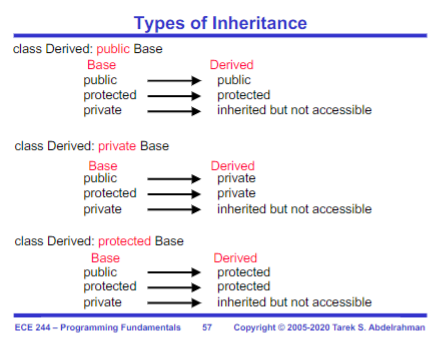

## 12/02- Complexity Analysis
---
- in this course, complexity refers to time complexity (how long it takes a program to run with respect to some parameters)
- step: a set of instructions that takes a constant amount of time (independent of input size and data) on any machine
- we measure time in steps: Time = f(n,data) where n is the input size and data is the actual input itself
- we get rid of data in the function by splitting the function into three: 
1. Time_best = f_best(n)
2. Time_avg = f_avg(n)
3. Time_worst = f_worst(n)

In [ ]:
/*** This is the end of the notebook. Start your code here and play around! ***/